## Лабораторная работа #3

Реализовать однослойную нейронную сеть, работающую по `Дельта-правилу`.

Обучить её для классификации образов букв.

In [1]:
import matplotlib.pyplot as plt
import scipy.special
from tqdm.notebook import tqdm
import numpy as np

In [2]:
class NeuralNetwork:
    def __init__(self,
        input_nodes: int,
        out_nodes: int,
        lr: int,
    ):
        self.input_nodes = input_nodes
        self.outs = np.zeros(out_nodes)
        self.lr = lr
        self.errors = np.zeros(len(self.outs))
        
        # Начальная инициализация весов
        self.weights = np.random.normal(
            0.0,
            0.1,
            (len(self.outs), self.input_nodes)
        )

    def fit(self,
        X,
        Y,
    ):
        # Пробуем предсказать
        test_out = self.predict_proba(X)

        # Преобразование данных к нужному виду
        X = np.array(X, ndmin=2).T
        Y = np.array(Y, ndmin=2).T
        
        _out = np.array(test_out.T[0], dtype=float)
        _y = np.array(Y.T[0], dtype=int)
        
        # Ошибка выходного слоя по дельта-правилу
        self.errors = _y - _out
         
        # Обновление весов по дельта-правилу
        for j, y in enumerate(self.outs):
            for i, x in enumerate(X):
                self.weights[j][i] = self.weights[j][i] \
                    + self.lr * self.errors[j] * x

    def predict_proba(self, X):
        X = np.array(X, ndmin=2).T
        self.outs = self.act_func(np.dot(self.weights, X))
        return self.outs
    
    def act_func(self, x):
        # Сигмоидальная функция активации
        return scipy.special.expit(x)
    
    def squared_error(self):
        # Квадратичная ошибка
        return sum(self.errors**2)

In [3]:
digits = np.array([
    [0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2],
    [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 3],
    [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 4],
    [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 5],
])

In [4]:
digits

array([[0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2],
       [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 3],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 4],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 5]])

In [5]:
def show_images(images):
    n = len(images)
    f = plt.figure(figsize=(10, 8))
    for i in range(n):
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i][:-1].reshape((5, 3)))

    plt.show(block=True)

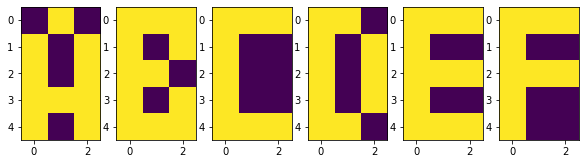

In [6]:
show_images(digits)

In [7]:
OUT_NODES = len(digits)

nn = NeuralNetwork(
    input_nodes=15,
    out_nodes=OUT_NODES,
    lr=0.25,
)

In [8]:
print(nn.predict_proba(digits[0][:-1]), digits[0][-1])
print(nn.predict_proba(digits[1][:-1]), digits[1][-1])
print(nn.predict_proba(digits[2][:-1]), digits[2][-1])

[[0.4177111 ]
 [0.48168312]
 [0.38288471]
 [0.50253067]
 [0.57690252]
 [0.50403652]] 0
[[0.45383789]
 [0.48387962]
 [0.38727147]
 [0.54398157]
 [0.51606617]
 [0.42690368]] 1
[[0.44500108]
 [0.47752709]
 [0.45494579]
 [0.58216484]
 [0.5217222 ]
 [0.40245654]] 2


In [9]:
for epoch in tqdm(range(10)):
    np.random.shuffle(digits)
    mse = 0
    for digit in digits:
        yi = digit[-1]
        Y = np.zeros(OUT_NODES)
        Y[yi] = 1
        X = digit[:-1].reshape(15)
        nn.fit(X, Y)
        mse += nn.squared_error()
    print(f'epoch[{epoch}], mse = {mse / len(digits)}')

epoch[0], mse = 1.3011001685607833
epoch[1], mse = 0.982583563500513
epoch[2], mse = 0.8216437170175269
epoch[3], mse = 0.6620485368897449
epoch[4], mse = 0.5635546431108388
epoch[5], mse = 0.49324450463445796
epoch[6], mse = 0.44183672306299476
epoch[7], mse = 0.3198740560690492
epoch[8], mse = 0.31474611879381903
epoch[9], mse = 0.2630696765405496



In [10]:
print(nn.predict_proba(digits[0][:-1]),
      f'expected: {digits[0][-1]}',
      f'out: {np.argmax(nn.predict_proba(digits[0][:-1]))}')
print(nn.predict_proba(digits[1][:-1]),
      f'expected: {digits[1][-1]}, ',
      f'out: {np.argmax(nn.predict_proba(digits[1][:-1]))}')
print(nn.predict_proba(digits[2][:-1]),
      f'expected: {digits[2][-1]},',
      f'out: {np.argmax(nn.predict_proba(digits[2][:-1]))}')
print(nn.predict_proba(digits[4][:-1]),
      f'expected: {digits[4][-1]},',
      f'out: {np.argmax(nn.predict_proba(digits[4][:-1]))}')

[[0.82403455]
 [0.06484763]
 [0.03990753]
 [0.13796073]
 [0.01642783]
 [0.04415282]] expected: 0 out: 0
[[0.01780442]
 [0.06469333]
 [0.19963646]
 [0.03088925]
 [0.31621629]
 [0.19495046]] expected: 4,  out: 4
[[0.02874255]
 [0.658972  ]
 [0.12054423]
 [0.0591951 ]
 [0.03794269]
 [0.03716806]] expected: 1, out: 1
[[0.02808653]
 [0.03806322]
 [0.08097903]
 [0.06371657]
 [0.14383822]
 [0.77685003]] expected: 5, out: 5
